In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [39]:
path='C:\\Users\\Lenovo\\Downloads\\Image Classification CNN Keras Dataset-20231124T163518Z-001\\Image Classification CNN Keras Dataset\\'

X_train = np.loadtxt(path+'input.csv', delimiter = ',')
Y_train = np.loadtxt(path+'labels.csv', delimiter = ',')

X_test = np.loadtxt(path+'input_test.csv',delimiter = ',')
Y_test = np.loadtxt(path+'labels_test.csv', delimiter = ',')


In [40]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255
X_test=X_test/255


In [41]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


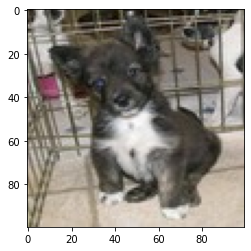

In [44]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()



In [47]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    
])



In [50]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [52]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 3s 80ms/step - loss: 0.4412 - accuracy: 0.8000
Epoch 2/5
32/32 [==============================] - 2s 76ms/step - loss: 0.3963 - accuracy: 0.8265
Epoch 3/5
32/32 [==============================] - 3s 79ms/step - loss: 0.3566 - accuracy: 0.8440
Epoch 4/5
32/32 [==============================] - 3s 105ms/step - loss: 0.3141 - accuracy: 0.8720
Epoch 5/5
32/32 [==============================] - 3s 104ms/step - loss: 0.2639 - accuracy: 0.8925


In [54]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 17ms/step - loss: 0.6713 - accuracy: 0.6800


[0.6713395714759827, 0.6800000071525574]

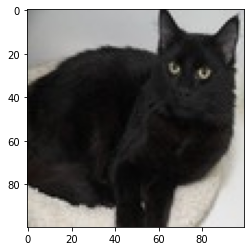

1/1 [==============================] - 0s 24ms/step
[[0.9988038]]
Our model says its is a : cat


In [79]:
idx2=random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)

y_pred=y_pred > 0.5

if(y_pred == 0):
    pred='dog'
else:
    pred='cat'
    
print("Our model says its is a :", pred)

In [ ]:
#     ******THE END*******